In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pycta.portfolio import Portfolio
from pycta.beakerx import *
from pycta.analysis import Analysis
from pycta.signal import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [6]:
# Load prices
prices = pd.read_csv("data/prices.csv", index_col=0, parse_dates=True).ffill().truncate(before="1970-01-01")

In [7]:
mu = np.tanh(prices.apply(returns_adjust, com=32, clip=4.2).cumsum().apply(osc))
vola = prices.pct_change().ewm(com=32, min_periods=32).std()

# compute the series of Euclidean norms by compute the sum of squares for each row
euclid_norm = np.sqrt((mu*mu).sum(axis=1))

# Divide each column of mu by the Euclidean norm
risk_scaled = mu.apply(lambda x: x/euclid_norm, axis=0)

portfolio = Portfolio(prices=prices, position=risk_scaled/vola)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
a = Analysis(portfolio.nav())
a.performance

Performance number
Annua Return                         17.54
Annua Volatility                     16.03
Annua Sharpe Ratio (r_f = 0)          1.09
Max Drawdown                         36.16
Return                          274,376.40
Kurtosis                              3.45
dtype: object

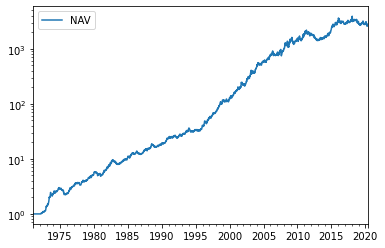

In [9]:
a.nav.plot(logy=True)
plt.show()

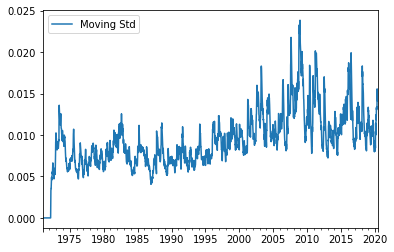

In [10]:
a.std.plot(kind="line")
plt.show()

# Conclusions
* Diagonal Markowitz already helps to improve the Sharpe Ratio. 
* The risk position is always scaled such that the risk is constant. This helps in particular to bring down the Kurtosis.
* The risk however does not reflect any cross-correlations.